In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Looking into the Solar Power Plant Data

* We tend to make decisions based on simple intuitiona and logic. Proving our point is quite essential in the Data Science world.

* We will be exploring the dataset given, Solar Power Plant of Atria University. Analysis will be done on a basic level considering the fact that we have reached about three weeks of studying the surface of Data Science.

* We will be looking into the data on Plant 2( Generation and Weather Sensor Data). We may consider that of Plant 1 when needed.

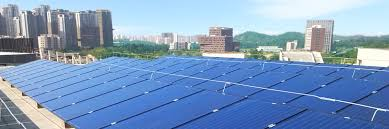



* We will start off with simple pre-processing of data followed by graphs with interesting plots
* Follow the data, code and result with the headings given in order.

We will start with the Plant 2 Generation Data

# Plant 2 Generation Data

 ## Pre-Processing of Data

* Reading and importing the files in the format- csv,url,etc..
* Using basic command line print,convert,info,describe to analyze data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading CSV Files and importing them
df_pgen2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
df_pgen2

In [ ]:
df_copy=df_pgen2.copy()        #creating a copy of original data set 

In [ ]:
#Converting DATE_TIME to date,hour,minute format for further use in analyzing data

df_copy['DATE_TIME']= pd.to_datetime(df_copy['DATE_TIME'])
df_copy['DATE']= pd.to_datetime(df_copy['DATE_TIME']).dt.date
df_copy['HOUR'] = pd.to_datetime(df_copy['DATE_TIME']).dt.hour
df_copy['MINUTES'] = pd.to_datetime(df_copy['DATE_TIME']).dt.minute

In [ ]:
#To find Number of days the data of the plant has been recorded = 34days
print('Number of days for which observations are avialable = ',len(df_copy['DATE'].unique()))

In [ ]:
#To find number of invertors in the plant = 22 invertors
print('Number of Invetors in Plant 2 = ',len(df_pgen2['SOURCE_KEY'].unique()))

In [ ]:
df_copy.isnull().values.any() #So there is no empty place/NA in plant 2 generation

* Considering the Daily Yield to plot graphs and analyze data

In [ ]:
#Max daily yield for each day
temp_max = df_copy.groupby(['SOURCE_KEY','DATE']).agg(DAILY_YIELD = ('DAILY_YIELD',max))
print('MAX daily yield for each day')
temp_max.head(50)

In [ ]:
#Min Daily Yield per day
temp_min = df_copy.groupby(['SOURCE_KEY','DATE']).agg(DAILY_YIELD = ('DAILY_YIELD',min))
print('MIN daily yield for each day')
temp_min.head(50)

In [ ]:
#Plot between daily yield and date
keys = df_copy['SOURCE_KEY'].unique()
_, ax = plt.subplots(1,1,figsize=(22,20))
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY'] == key]
    ax.plot(data.DATE,
            data.DAILY_YIELD,
            marker='^',
            linestyle='',
            alpha=.5,
            ms=10,
            label=key
           )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('DATE vs DAILY YIELD for Plant 2')
plt.xlabel('DATE')
plt.ylabel('DAILY YIELD')
plt.show()


In [ ]:
#Hour vs Daily yield
keys = df_copy['SOURCE_KEY'].unique()
_, ax = plt.subplots(1,1,figsize=(22,20))
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY'] == key]
    ax.plot(data.DAILY_YIELD,
            data.HOUR,
            marker='^',
            linestyle='',
            alpha=.5,
            ms=10,
            label=key
           )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('HOUR vs DAILY YIELD for plant2')
plt.xlabel('DAILY YIELD')
plt.ylabel('HOUR')
plt.show()

In [ ]:
dates = df_copy['DATE'].unique()
keys = df_copy['SOURCE_KEY'].unique()
_, ax = plt.subplots(1,1,figsize=(22,20))
for key in keys :
    data1=df_copy[df_copy['SOURCE_KEY'] == key]
    for date in dates:
        data2 = data1[data1['DATE'] ==  date]
        ax.plot(data2.DAILY_YIELD,
                data2.HOUR,
                marker='^',
                linestyle='',
                alpha=.5,
                ms=10,
                label=key
               )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('HOUR vs DAILY YIELD for plant2')
plt.xlabel('HOUR')
plt.ylabel('DAILY YIELD')
plt.show()

In [ ]:
print('mean of daily daily yield = ',df_pgen2['DAILY_YIELD'].mean())

In [ ]:
data= df_copy.groupby(df_copy['SOURCE_KEY'])['DAILY_YIELD'].mean()
data


In [ ]:
fig = plt.figure(figsize =(10, 9)) 
df_copy.groupby(df_copy['SOURCE_KEY'])['DAILY_YIELD'].mean().plot.bar()
plt.grid()
plt.title('MEAN DAILY YIELD of each INVETOR')
plt.ylabel('MEAN DAILY YIELD')
plt.show()

* This shows that meanly daily yield is : 
*  Maximun of invetor "xMbIugepa2P7lBB" and equal to "4901.644676" and 
*  Minium by invetor "Et9kgGMDl729KT4" which is equal to "2356.332188" and 
*  Average of DAILY YIELD = 3294.8902951797813

In [ ]:
dates = df_copy['DATE'].unique()
count = 0
for date in dates:
    data =  df_copy[df_copy['DATE'] == date]['DAILY_YIELD'].mean()
    count+=1
    print(data)
count

* Mean Daily Yield for each Date

In [ ]:
#Mean daily yield per day
dates = df_copy['DATE'].unique() 
for date in dates:
    print('On',date,'Mean DAILY YIELD is ',df_copy[df_copy['DATE']==date]['DAILY_YIELD'].mean())


In [ ]:
dates = df_copy['DATE'].unique() 
for date in dates:
    fig = plt.figure(figsize =(10, 9)) 
    df_copy.groupby(df_copy['SOURCE_KEY'])['DAILY_YIELD'].mean().plot.bar()
    plt.grid()
    plt.title(date)
    plt.ylabel('DAILY YIELD')
    plt.show()
    print('On',date,'mean DAILY YIELD is ',df_copy[df_copy['DATE']==date]['DAILY_YIELD'].mean())


* On "2020-06-17" mean DAILY YIELD is "1982.5634695165943" and also least among all the dates.

* And invetor "Et9kgGMDl729KT4" is producing least daily yield on each and every date

Mean Total Yield of each Invertor

In [ ]:
data = df_copy.groupby(df_copy['SOURCE_KEY'])['TOTAL_YIELD'].mean()
data

In [ ]:
fig = plt.figure(figsize =(10, 5)) 
df_copy.groupby(df_copy['SOURCE_KEY'])['TOTAL_YIELD'].mean().plot.bar()
plt.grid()
plt.title('MEAN TOTAL YIELD of each INVETOR')
plt.ylabel('MEAN TOTAL YIELD')
plt.show()

* AC Power & DC Power

In [ ]:
temp_max = df_copy.groupby(['SOURCE_KEY','DATE']).agg(AC_POWER_MAX = ('AC_POWER',max))
print('MAX ac power for each day')
temp_max.head(50)

In [ ]:
temp_max = df_copy.groupby(['SOURCE_KEY','DATE']).agg(DC_POWER_MAX = ('DC_POWER',max))
print('MAX dc power for each day')
temp_max.head(50)

* AC Power of each Invertor

In [ ]:
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
     print('Invetor',key,'produce mean ac power is',df_copy[df_copy['SOURCE_KEY']==key]['AC_POWER'].mean())


In [ ]:
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    fig = plt.figure(figsize =(15, 9)) 
    df_copy.groupby(df_copy['DATE'])['AC_POWER'].mean().plot.bar()
    plt.grid()
    plt.title(key)
    plt.ylabel('AC POWER')
    plt.show()
    print('Invetor',key,'produce mean ac power is',df_copy[df_copy['SOURCE_KEY']==key]['AC_POWER'].mean())

* Invetor "Quc1TzYxW2pYoWX" produce least mean ac power and is 169.6447354598975

In [ ]:
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    _,ax = plt.subplots(1,1,figsize =(20,6)) 
    ax.plot(data.AC_POWER,
            data.DC_POWER,
            marker='+',
            linestyle=''
            )
    ax.grid()
    ax.margins(0.05)
    ax.legend()
    plt.title(key)
    plt.xlabel('AC POWER')
    plt.ylabel('DC POWER')
    plt.show()

AC Power with Date

In [ ]:
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    _,ax = plt.subplots(1,1,figsize =(20,6)) 
    ax.plot(data.DATE,
            data.AC_POWER,
            marker='^',
            linestyle=''
            )
    ax.grid()
    ax.margins(0.05)
    ax.legend()
    plt.title(key)
    plt.ylabel('AC POWER')
    plt.xlabel('DATE')
    plt.show()

* Invetor "IQ2d7wf4YD8zU1Q" ,"NgDl19wMapZy17u", "mqwcsP2rE7J0TFp", "xMbIugepa2P7lBB" has not produced AC Power from "21-05-2020" to "28-05-2020"

AC Power for every Hour

In [ ]:
dates = df_copy['DATE'].unique()
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    print('Analyise of ',key,'for ecah day on hours based')
    for date in dates:
        data2 = df_copy[df_copy['DATE']==date]
        _,ax = plt.subplots(1,1,figsize =(20,6)) 
        ax.plot(data2.HOUR,
                data2.AC_POWER,
                marker='+',
                linestyle=''
                )
        ax.grid()
        ax.margins(0.05)
        ax.legend()
        plt.title(date)
        plt.xlabel('HOUR')
        plt.ylabel('AC POWER')
        plt.show()

DC Power with Date

In [ ]:
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    _,ax = plt.subplots(1,1,figsize =(20,6)) 
    ax.plot(data.DATE,
            data.DC_POWER,
            marker='^',
            linestyle=''
            )
    ax.grid()
    ax.margins(0.05)
    ax.legend()
    plt.title(key)
    plt.ylabel('DC POWER')
    plt.xlabel('DATE')
    plt.show()

* Invetor "IQ2d7wf4YD8zU1Q" ,"NgDl19wMapZy17u","mqwcsP2rE7J0TFp","xMbIugepa2P7lBB" has not produced dc power from "21-05-2020" to "28-05-2020"

DC Power for every Hour

In [ ]:
dates = df_copy['DATE'].unique()
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    print('Analyise of ',key,'for ecah day on hours based')
    for date in dates:
        data2 = df_copy[df_copy['DATE']==date]
        _,ax = plt.subplots(1,1,figsize =(20,6))
        ax.plot(data2.HOUR,
                data2.DC_POWER,
                marker='+',
                linestyle=''
                )
        ax.grid()
        ax.margins(0.05)
        ax.legend()
        plt.title(date)
        plt.xlabel('HOUR')
        plt.ylabel('DC POWER')
        plt.show()

DC Power Vs Daily Yield

In [ ]:
print('DC POWER VS DAILY YIELD')
dates = df_copy['DATE'].unique()
keys = df_copy['SOURCE_KEY'].unique() 
for key in keys:
    data = df_copy[df_copy['SOURCE_KEY']==key]
    print('Analyise of ',key)
    for date in dates:
        data2 = df_copy[df_copy['DATE']==date]
        _,ax = plt.subplots(1,1,figsize =(20,5)) 
        ax.plot(data2.DAILY_YIELD,
                data2.DC_POWER,
                marker='+',
                linestyle=''
                )
        ax.grid()
        ax.margins(0.05)
        ax.legend()
        plt.title(date)
        plt.xlabel('DAILY YIELD')
        plt.ylabel('DC POWER')
        plt.show()


## Using FbProphet 

* It is a library developed recently developed by the Facebook commitee to ensre easier access to data and analytics.
* It has gained recent popularity and craze by many Computer Scientists,Data Scientists and Coders
* Here we have used a simple version of what can be done using this library.

In [ ]:
from fbprophet import Prophet
df_pgen2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
df_pgen2.head()
df_pgen2=df_pgen2.rename(columns={'DATE_TIME':'ds', 'TOTAL_YIELD':'y'})
df_pgen2

In [ ]:
m = Prophet()
m.fit(df_pgen2)

In [ ]:
future = m.make_future_dataframe(periods=34)
future


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
fig1 = m.plot(forecast)


In [ ]:
fig2 = m.plot_components(forecast)

## Time Series Analysis

* We tend to like to predict when something might happen. For example,if it may rain tomorrow. While some are worth predicting, there are chances of people predicting the end of the world which tends to create great distress.
* While we are not predicting the end of the world today, we are using simple methods to predict a few variables like we have done using FbProphet.
* There are many ways to interpret and analyze data in the time series analysis part.
* Here are a few methods:
1.ARIMA
2.SARIMA
3.ARIMAX
4.SARIMAX

In [ ]:
from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [ ]:
df_pgen2['DATE_TIME']= pd.to_datetime(df_pgen2['DATE_TIME'])
df_pgen2['DATE']= pd.to_datetime(df_pgen2['DATE_TIME']).dt.date
df_pgen2['HOUR'] = pd.to_datetime(df_pgen2['DATE_TIME']).dt.hour
df_pgen2['MINUTES'] = pd.to_datetime(df_pgen2['DATE_TIME']).dt.minute

In [ ]:
df_dyield = df_pgen2.groupby('DATE')['DAILY_YIELD'].max().reset_index()
df_dyield

In [ ]:
#Checking the index
df_dyield = df_dyield.set_index('DATE')
df_dyield.index 

In [ ]:
df_dyield

In [ ]:
y = df_dyield['DAILY_YIELD']
y

In [ ]:
y.plot(figsize=(12,5))
plt.show()

* Using forecast and predictions to find accuracy and errors.

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1,0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(16, 8))
plt.show()

#What to look for?
#1. Residuals SHOULD be Normally Distributed ; Check
#Top Right: The (orange colored) KDE line should be closely matched with green colored N(0,1) line. This is the standard notation
#for normal distribution with mean 0 and sd 1.
#Bottom Left: The qq plot shows the ordered distribution of residuals (blue dots) follows the linear trend of the samples 
#taken from a standard normal distribution with N(0, 1). 

#2. #Residuals are not correlated; Check
#Top Left: The standard residuals don’t display any obvious seasonality and appear to be white noise. 
#Bottom Right: The autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have 
#low correlation with its own lagged versions.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-6-01':]
#Mean absolute percentage error

mape=(((y_forecasted - y_truth) / y_truth).mean())*100
print('MAPE: {}'.format(round(mape, 2)))

# Plant 2 Weather Sensor Data

# Pre Processing

* Importing csv files
* Using basic code to analyze data
* Connverting and merging data to analyze our purpose

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_wgen2=pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
df_wgen2

In [ ]:
df_wgen2['DATE_TIME'] = pd.to_datetime(df_wgen2['DATE_TIME'],format = '%Y-%m-%d %H:%M')


In [ ]:
df_wgen2['DATE'] = df_wgen2['DATE_TIME'].apply(lambda x:x.date())
df_wgen2['TIME'] = df_wgen2['DATE_TIME'].apply(lambda x:x.time())

In [ ]:
df_wgen2['DATE'] = pd.to_datetime(df_wgen2['DATE'],format = '%Y-%m-%d').dt.date
df_wgen2['HOUR'] = pd.to_datetime(df_wgen2['TIME'],format='%H:%M:%S').dt.hour
df_wgen2['MINUTES'] = pd.to_datetime(df_wgen2['TIME'],format='%H:%M:%S').dt.minute


# Graphs and Plots
## The most interesting part of a notebook are the vibrant graphs one must display.

* Plots against DATE_TIME

In [ ]:
#The below graph shows the relation between the module temperature and how it is changing with respect to date and time.
#We can see that module temperature is higher on few partcular days like 5/18.

_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE_TIME'],
        df_wgen2['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module temperature',
       color='r')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date & Time vs. Module Tempreture')
plt.xlabel('Date & Time')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE_TIME'],
        df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Ambient temperature',
       color='r')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date & Time vs. Ambient Tempreture')
plt.xlabel('Date & Time')
plt.ylabel('Ambient Tempreture')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE_TIME'],
        df_wgen2['IRRADIATION'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation',
       color='r')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date & Time vs. Irradiation')
plt.xlabel('Date & Time')
plt.ylabel('Irradiation')
plt.show()

* Plots against Date

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE'],
        df_wgen2['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module temperature',
       color='g')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date vs. Module Tempreture')
plt.xlabel('Date')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE'],
        df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Ambient temperature',
       color='g')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date vs. Ambient Tempreture')
plt.xlabel('Date')
plt.ylabel('Ambient Tempreture')
plt.show()

In [ ]:
# We can see that irradiation constantly increases and decreases without any sort of deviation.
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE'],
        df_wgen2['IRRADIATION'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation',
       color='g')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date vs. Irradiation')
plt.xlabel('Date')
plt.ylabel('Irradiation')
plt.show()

* Plots against Hour

In [ ]:
#After 10hrs of the functioning of the plant we can see gradual increase in the module temperature till it strikes evening. It then follows a gradual decrese.
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR'],
        df_wgen2['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module Temperature',
        color='m'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Module Temperature')
plt.xlabel('Time')
plt.ylabel('Module Temperature')
plt.show()

In [ ]:
#Maximum temperature can be recorded after 15 hours of functioning of the plant.
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR'],
        df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Ambient Temperature',
        color='m'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Ambient Temperature')
plt.show()

In [ ]:
#Maximum irradiation is possible after 12hrs of working of the plant(noon).
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR'],
        df_wgen2['IRRADIATION'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation',
        color='m'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Irradiation')
plt.xlabel('Time')
plt.ylabel('Irradiation')
plt.show()

* Plots Against Minutes

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['MINUTES'],
        df_wgen2['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module Temperature',
        color='y'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Module Temperature')
plt.xlabel('Time')
plt.ylabel('Module Temperature')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['MINUTES'],
        df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Ambient Temperature',
        color='y'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Ambient Temperature')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['MINUTES'],
        df_wgen2['IRRADIATION'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation',
        color='y'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Irradiation')
plt.xlabel('Time')
plt.ylabel('Irradiation')
plt.show()

* Plots against Hours & Minutes

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR']+df_wgen2['MINUTES'],
        df_wgen2['MODULE_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Module Temperature',
        color='c'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Module Temperature')
plt.xlabel('Time')
plt.ylabel('Module Temperature')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR']+df_wgen2['MINUTES'],
        df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Ambient Temperature',
        color='c'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Ambient Temperature')
plt.xlabel('Time')
plt.ylabel('Ambient Temperature')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['HOUR']+df_wgen2['MINUTES'],
        df_wgen2['IRRADIATION'],
        marker='o',
        linestyle='',
        alpha=.5,
        ms=10,
        label='Irradiation',
        color='c'
       )
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Time vs. Irradiation')
plt.xlabel('Time')
plt.ylabel('Irradiation')
plt.show()

* Plots against Variables

In [ ]:
#The plot shows a gradual increase in the temperature of the plant
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2.AMBIENT_TEMPERATURE,
        df_wgen2.MODULE_TEMPERATURE,
        marker='o',
        linestyle='',
        alpha=.4,
        ms=10,
        label='Module Temperature (centigrade)',
       color='b')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture vs. Module Tempreture')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Module Tempreture')
plt.show()

In [ ]:
#The plot is quite hard to read but we can make out the steady increase and decrase of temperature with irradiation. Hence temperature is proportional to irradiation.
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2.AMBIENT_TEMPERATURE,
        df_wgen2.IRRADIATION,
        marker='o',
        linestyle='',
        alpha=.4,
        ms=10,
        label='Irradiation',
       color='b')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture vs. Irradiation')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Irradition')
plt.show()

In [ ]:
#Increase in irradiation shows us increase in module temperature
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2.MODULE_TEMPERATURE,
        df_wgen2.IRRADIATION,
        marker='o',
        linestyle='',
        alpha=.4,
        ms=10,
        label='Irradiation',
       color='b')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Module Tempreture vs. Irradiation')
plt.xlabel('Module Tempreture')
plt.ylabel('Irradition')
plt.show()

### Multivariate Plots
* This type of plot is necessary to analyze a broader aspect of the data given.

In [ ]:
#Increase in irradiation results in the increase of the ambient and module temperature.
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['IRRADIATION'],
        df_wgen2['MODULE_TEMPERATURE']+df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5, #transparency
        ms=10, #size of the dot
        label='temperature (Module + Ambient)',
       color='r')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Irradiation vs. Tempreture ')
plt.xlabel('Irradiation')
plt.ylabel('Tempreture')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2['DATE_TIME'],
        df_wgen2['MODULE_TEMPERATURE']+df_wgen2['AMBIENT_TEMPERATURE'],
        marker='o',
        linestyle='',
        alpha=.5, #transparency
        ms=10, #size of the dot
        label='temperature (Module + Ambient)',
       color='r')
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Date & Time vs. Tempreture ')
plt.xlabel('Date & Time')
plt.ylabel('Tempreture')
plt.show()

In [ ]:
dates = df_wgen2['DATE'].unique()

_, ax = plt.subplots(1, 1, figsize=(18, 9))

for date in dates:
    df_data = df_wgen2[df_wgen2['DATE']==date]

    ax.plot(df_data.AMBIENT_TEMPERATURE,
            df_data.MODULE_TEMPERATURE,
            marker='o',
            linestyle='',
            alpha=.5,
            ms=12,
            label=pd.to_datetime(date,format='%Y-%m-%d').date()
           )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Module Tempreture vs. Ambient Tempreture')
plt.xlabel('Ambient Tempreture')
plt.ylabel('Module Tempreture')
plt.show()


In [ ]:
dates = df_wgen2['DATE'].unique()

_, ax = plt.subplots(1, 1, figsize=(18, 9))

for date in dates:
    df_data = df_wgen2[df_wgen2['DATE']==date]

    ax.plot(df_data.IRRADIATION,
            marker='o',
            linestyle='',
            alpha=.5,
            ms=10,
            label=pd.to_datetime(date,format='%Y-%m-%d').date()
           )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Irradition Per Day')
plt.xlabel('Irradition')
plt.ylabel('')
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

ax.plot(df_wgen2.DATE_TIME,
        df_wgen2.AMBIENT_TEMPERATURE.rolling(window=20).mean(),
        label='Ambient',
        color='r'
       )

ax.plot(df_wgen2.DATE_TIME,
        df_wgen2.MODULE_TEMPERATURE.rolling(window=20).mean(),
        label='Module',
        color='c'
       )

ax.plot(df_wgen2.DATE_TIME,
        (df_wgen2.MODULE_TEMPERATURE-df_wgen2.AMBIENT_TEMPERATURE).rolling(window=20).mean(),
        label='Difference',
        color='m'
       )

ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('Ambient Tempreture and Module Tempreture over 34 Days')
plt.xlabel('Date and Time')
plt.ylabel('Tempreture')
plt.show()

# Decomposition of data to plot graphs

In [ ]:
i=df_wgen2['IRRADIATION']
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(i, model='additive',period=34)
fig = decomposition.plot()
plt.show()

In [ ]:
m=df_wgen2['MODULE_TEMPERATURE']
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(m, model='additive',period=34)
fig = decomposition.plot()
plt.show()

In [ ]:
a=df_wgen2['AMBIENT_TEMPERATURE']
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(a, model='additive',period=34)
fig = decomposition.plot()
plt.show()

Merging of Data

In [ ]:
df_pgen2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
df_wgen2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')


In [ ]:
result_inner = pd.merge(df_pgen2,df_wgen2, on='DATE_TIME',how='inner') #left, right, outer, inner

In [ ]:
result_left = pd.merge(df_pgen2,df_wgen2, on='DATE_TIME',how='left') #left, right, outer, inner

In [ ]:
result_left['IRRADIATION'] = result_left['IRRADIATION'].fillna(0)
result_left['AMBIENT_TEMPERATURE'] = result_left['AMBIENT_TEMPERATURE'].fillna(0)
result_left['MODULE_TEMPERATURE'] = result_left['MODULE_TEMPERATURE'].fillna(0)

X = result_left.iloc[:, 15:16].values #Irradiation
y = result_left.iloc[:, 3].values #DC_Power
X,y

In [ ]:
result_inner['IRRADIATION'] = result_inner['IRRADIATION'].fillna(0)
result_inner['AMBIENT_TEMPERATURE'] = result_inner['AMBIENT_TEMPERATURE'].fillna(0)
result_inner['MODULE_TEMPERATURE'] = result_inner['MODULE_TEMPERATURE'].fillna(0)

X = result_inner.iloc[:, 15:16].values #Irradiation
y = result_inner.iloc[:, 3].values #DC_Power
X,y

## * Train and Test Data

* Training and testing model to perfection is anyone's dream.
* One thing to remember is that a model is not supposed to be absolutely 'perfect. This often leads to inaccuracy of data.
* It may lead to an overfitted or underfitted modelwhich is practically of no use to us later on.
* We look forward for a model which follows a protocol but also makes ammendments and learns from mistakes so that it can be a proper model for users to use.
* Even a model is't a fairy that can tell you exact predictions!

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X = result_left[['IRRADIATION','MODULE_TEMPERATURE']]
y = result_left['DC_POWER']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=0)

## * Linear Regression Model

* It is a basic model to nalyze data.
* We must ensure to not make our model a underfitted or overfitted one.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns = ['Coefficients'])
coeff_df

Predictions

In [ ]:
y_pred = lin_reg.predict(X_test)

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df.head(10)

## * Accuracy

In [ ]:
# Let's predict!
y_pred = lin_reg.predict(X_test)

In [ ]:
lin_reg.coef_

In [ ]:

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_df.head(10)

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
print("Train Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))
print('---------------------------')
print("Test Set Accuracy")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
lin_reg.predict([[0.4,50]]) #0.4 irradiation and 50 degrees of module temperature

# Using FbProphet

* We will be using fbprphet in the similar way we have before.
* It requires two columns ds(in date time formar) and y (any column).


In [ ]:
from fbprophet import Prophet
df_wgen2 = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
df_wgen2.head()
df_wgen2=df_wgen2.rename(columns={'DATE_TIME':'ds', 'IRRADIATION':'y'})
df_wgen2

In [ ]:
m = Prophet()
m.fit(df_wgen2)

In [ ]:
future = m.make_future_dataframe(periods=34)
future


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
fig1 = m.plot(forecast)


In [ ]:
fig2 = m.plot_components(forecast)

### Day wise Summary

In [ ]:
df_wgen2['DATE_TIME'] = pd.to_datetime(df_wgen2['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [ ]:
df_wgen2['DATE'] = df_wgen2['DATE_TIME'].apply(lambda x:x.date())
df_wgen2['TIME'] = df_wgen2['DATE_TIME'].apply(lambda x:x.time())

In [ ]:
df_wgen2['DATE'] = pd.to_datetime(df_wgen2['DATE'],format = '%Y-%m-%d').dt.date
df_wgen2['HOUR'] = pd.to_datetime(df_wgen2['TIME'],format='%H:%M:%S').dt.hour
df_wgen2['MINUTES'] = pd.to_datetime(df_wgen2['TIME'],format='%H:%M:%S').dt.minute

In [ ]:

day_summary = df_wgen2.groupby('DATE').agg(TOTAL_IRRADIANCE = ('IRRADIATION', sum),
                                         DATE = ('DATE',max)
                                        )

In [ ]:
day_summary = day_summary.rename(columns={'DATE': 'ds', 'TOTAL_IRRADIANCE': 'y'})
day_summary

In [ ]:
from fbprophet import Prophet

In [ ]:
gm_prophet =Prophet(changepoint_prior_scale=0.25)

In [ ]:

gm_prophet.fit(day_summary)

In [ ]:
# Make a future dataframe 
gm_forecast = gm_prophet.make_future_dataframe(periods=40, freq='D')

# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)


In [ ]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Irradiation')
plt.title('Irradiation Prediction')

In [ ]:
import statsmodels.api as sm

In [ ]:
df_wgen2=df_wgen2.rename(columns={'DATE_TIME':'ds', 'IRRADIATION':'y'})

In [ ]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(df_wgen2['AMBIENT_TEMPERATURE']))
print(sm.tsa.stattools.adfuller(df_wgen2['MODULE_TEMPERATURE']))

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

* p= Auto-regressive parameters
* q= Moving Average Parameters
* d= Integrative part
* What is the process to find the values of p, d, q?

- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values
- We have done the AIC method

In [ ]:
#Get the best params for the data. Choose the lowest AIC.

# The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a 
# given set of data. 
# AIC measures how well a model fits the data while taking into account the overall complexity of the model.
# Large AIC: Model fits very well using a lot of features.
# Small AIC: Model fits similar fit but using lesser features. 
# Hence LOWER THE AIC, the better it is.

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue 


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0,0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
mape=(((-y_train + y_test) / y_test).mean())*100
print('MAPE: {}'.format(mape))

In [ ]:
mape=(((-y_test + y_pred) / y_pred).mean())*100
print('MAPE: {}'.format(mape))

In [ ]:
mape=(((-y_pred + y_test) / y_test).mean())*100
print('MAPE: {}'.format(mape))

From the table:

Coeff: Shows weight/impotance how each feature impacts the time series. Pvalue: Shows the significance of each feature weight. Can test hypothesis using this. If p value is <.05 then they are statitically significant.

Refresher on null hyp and pvalues. By default we take the null hyp as 'there is no relationship bw them' If p value < .05 (significance level) then you reject the Null Hypthesis If p value > .05 , then you fail to reject the Null Hypothesis.

So, if the p-value is < .05 then there is a relationship between the response and predictor. Hence, significant.

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

* The standardized residual is a measure of the strength of the difference between observed and expected values. It's a measure of how significant your cells are to the chi-square value.
*  Kernel-Density-Estimation (KDE). KDE tries to compute the underlying distribution of a variable, which will draw a very smooth line around the histogram. However, KDE will only work if we change the y axis from absolute values to density values.
* A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.
* Correlation or dependence is any statistical relationship, whether causal or not, between two random variables.

In [ ]:
df_dirr= df_wgen2.groupby('DATE_TIME')['IRRADIATION'].max().reset_index()
df_dirr

In [ ]:
#We are using the one day as the timestamp so that we can take all 34 days of data.
df_dirr = df_wgen2['IRRADIATION'].resample('D').mean()

In [ ]:
i = df_dyield['IRRADIATION']
i

In [ ]:
i.plot(figsize=(12,5))
plt.show()

In [ ]:
mape=(((-y_test + y_pred) / y_pred).mean())*100
print('MAPE: {}'.format(mape))

# Exploring a little further

In [ ]:
#JointPlot #Beehive Pattern
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [ ]:
#JointGrid
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)

# Generate a random bivariate dataset
rs = np.random.RandomState(9)
mean = [0, 0]
cov = [(1, 0), (0, 2)]
x, y = rs.multivariate_normal(mean, cov, 100).T

# Use JointGrid directly to draw a custom plot
grid = sns.JointGrid(x, y, space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

# Why?

* The purpose of the project is to analyze the given data and to make predictions using models and FbProphet.
* We now have clear understanding of the data.
* It was interesting to observe a few graphs and to analyze those codes associated with it later.
* While the hero seems to be the graphs we have plotted, we have faced villians (in the form of codes..Haha!)
* Hope we have setup a good plot to the audience.

# Let's look forward..
* As a group we have enjoyed working together in mentor sessions as well as in the class.
* We did come about new explorations and a new world of Data Science.
* The knowledge we have gained in this short span of time will hopefully help us in the future.
* Apart from the code and the concept, we have developed critical thinking skills.
* Most importantly we had FUN!
* We have discovered Data Science...Just the tip of the iceberg I guess!
### Thank You :)